---
# Libreria Matplotlib
- Funciones pyplot
- Modelo de Orientación a Objetos
- Apariencia
- Tipos de gráficos
- Estilos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de datos de Contagios por día

In [2]:
df = pd.read_csv('datos-covid-etareo.csv')
df.head()

,Grupo de edad,Sexo,Fecha,Contagios
0,00 - 04 años,M,2020-03-25,4
1,05 - 09 años,M,2020-03-25,2
2,10 - 14 años,M,2020-03-25,7
3,15 - 19 años,M,2020-03-25,8
4,20 - 24 años,M,2020-03-25,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Grupo de edad  3128 non-null   object
 1   Sexo           3128 non-null   object
 2   Fecha          3128 non-null   object
 3   Contagios      3128 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 97.9+ KB


In [4]:
df['Grupo de edad'].unique()

array(['00 - 04 años', '05 - 09 años', '10 - 14 años', '15 - 19 años',
       '20 - 24 años', '25 - 29 años', '30 - 34 años', '35 - 39 años',
       '40 - 44 años', '45 - 49 años', '50 - 54 años', '55 - 59 años',
       '60 - 64 años', '65 - 69 años', '70 - 74 años', '75 - 79 años',
       '80 y más años'], dtype=object)

In [ ]:
print(df['Fecha'].min(), df['Fecha'].max())

2020-03-25 2020-11-13


In [5]:
df2 = df.groupby('Fecha').sum().reset_index()
print(df2)
#df2=df2[["Contagios"]]
df3=df2[["Fecha","Contagios"]].copy()

         Fecha                                      Grupo de edad  \
0   2020-03-25  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
1   2020-03-26  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
2   2020-03-27  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
3   2020-03-28  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
4   2020-03-29  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
..         ...                                                ...   
87  2020-10-30  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
88  2020-11-02  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
89  2020-11-06  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
90  2020-11-09  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   
91  2020-11-13  00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...   

                                  Sexo  Contagios  
0   MMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFF       1012  
1   MMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFF       1252  
2   MMMMMMMMMMM

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha      92 non-null     object
 1   Contagios  92 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
df3.head()

,Fecha,Contagios
0,2020-03-25,1012
1,2020-03-26,1252
2,2020-03-27,1434
3,2020-03-28,1723
4,2020-03-29,1906


### Gráfico utilizando las funciones pyplot

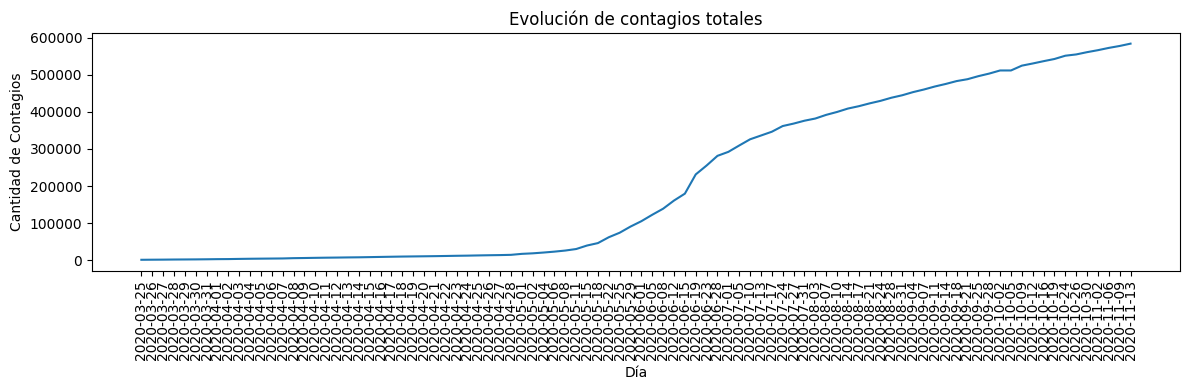

In [14]:
plt.figure(figsize=(12,4))
plt.plot(df3["Fecha"],df3["Contagios"])
plt.title('Evolución de contagios totales')
plt.xlabel('Día')
plt.ylabel('Cantidad de Contagios')
plt.xticks(rotation=90)
plt.tight_layout()

### Subgráficos

In [15]:
df_m = df[df['Sexo']=='M'].groupby('Fecha').sum().reset_index(drop=True)
df_m.head()

,Grupo de edad,Sexo,Contagios
0,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMM,496
1,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMM,610
2,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMM,704
3,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMM,867
4,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMM,959


In [36]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Grupo de edad  92 non-null     object
 1   Sexo           92 non-null     object
 2   Contagios      92 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ KB


In [16]:
df_f = df[df['Sexo']=='F'].groupby('Fecha').sum().reset_index(drop=True)

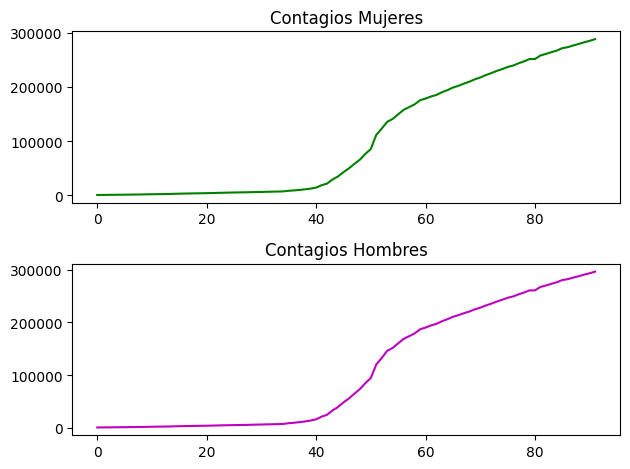

In [40]:
plt.subplot(2,1,2)
plt.plot(df_m["Contagios"], 'm')
plt.title('Contagios Hombres')

plt.subplot(2,1,1)
plt.plot(df_f["Contagios"], 'g')
plt.title('Contagios Mujeres')

plt.tight_layout()

Text(0.5, 1.0, 'Tendencia de Contagios Hombres vs mujeres')

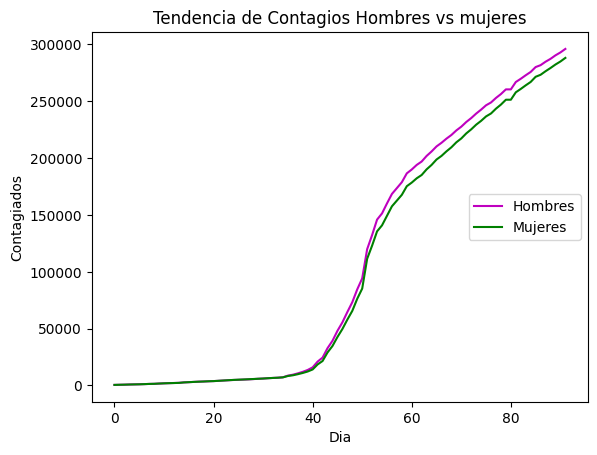

In [34]:
plt.plot(df_m["Contagios"], 'm',label='Hombres')
plt.plot(df_f["Contagios"], 'g',label='Mujeres')
plt.xlabel('Dia')
plt.ylabel('Contagiados')
plt.legend(loc=7)
plt.title('Tendencia de Contagios Hombres vs mujeres')


### Utilizando la orientación a objetos en la libreria Matplotlib

Text(0.5, 1.0, 'Total de Contagiados')

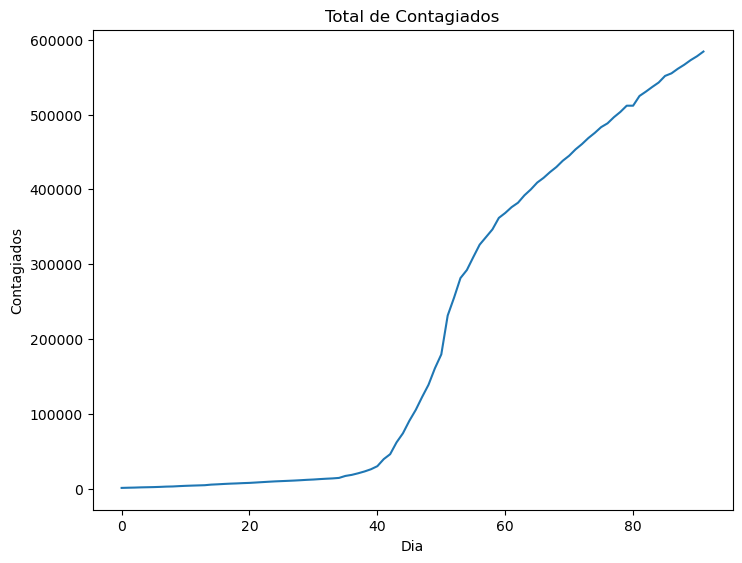

In [ ]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot(df3["Contagios"])
axe.set_xlabel('Dia')
axe.set_ylabel('Contagiados')
axe.set_title('Total de Contagiados')

### Posicionando varios ejes en una misma figura

Text(0.5, 1.0, 'Mujeres')

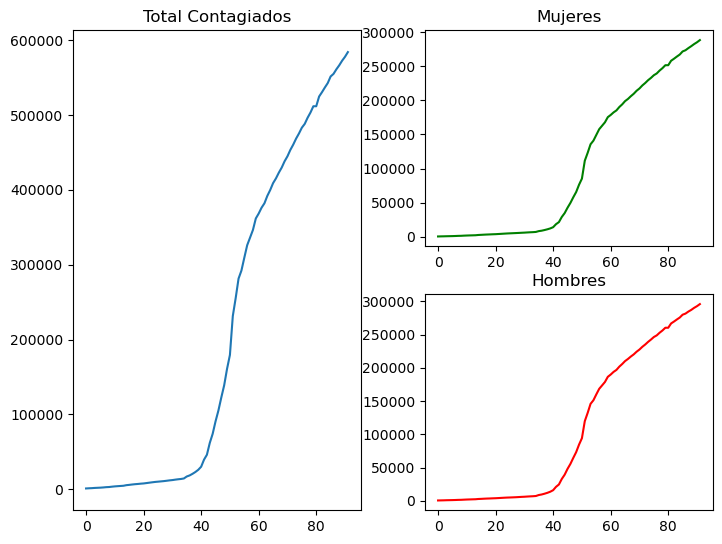

In [ ]:
fig = plt.figure()
axe1 = fig.add_axes( [0, 0, 0.45, 1] )
axe2 = fig.add_axes( [0.55, 0, 0.45, 0.45] )
axe3 = fig.add_axes( [0.55, 0.55, 0.45, 0.45])

axe1.plot(df3["Contagios"])
axe2.plot(df_m["Contagios"], 'r')
axe3.plot(df_f["Contagios"], 'g')

axe1.set_title('Total Contagiados')
axe2.set_title('Hombres')
axe3.set_title('Mujeres')

### Grilla de gráficos con orientación a objetos

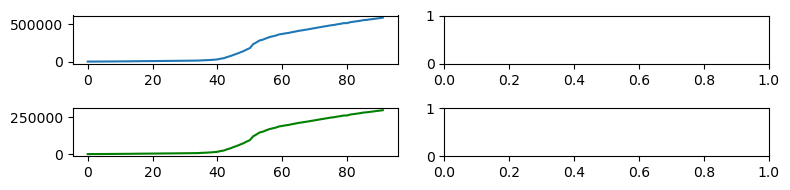

In [ ]:
fig, axes = plt.subplots( nrows=2 , ncols=2,figsize=(8,2) )
axes[0][0].plot(df3["Contagios"])
axes[1][0].plot(df_m["Contagios"],'g')
plt.tight_layout()

### Graficar más de una serie en un juego de ejes

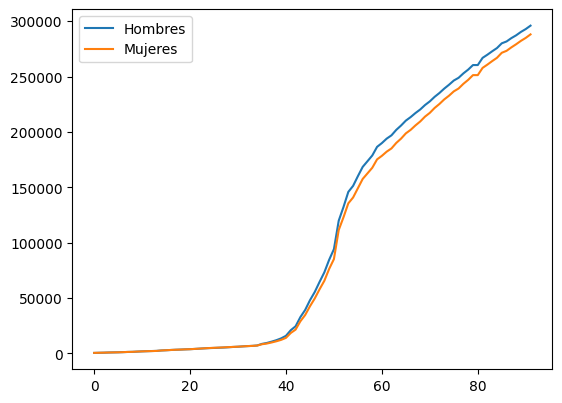

In [41]:
fig = plt.figure()
axe = fig.add_axes([0.2, 0.2, 0.75, 0.75])
axe.plot(df_m["Contagios"], label='Hombres')
axe.plot(df_f["Contagios"], label='Mujeres')
axe.legend(loc=0)

### Guardar un grafico como imagen

In [46]:
fig.savefig('mi-grafico1.jpeg', dpi=100)

### Personalizando la apariencia

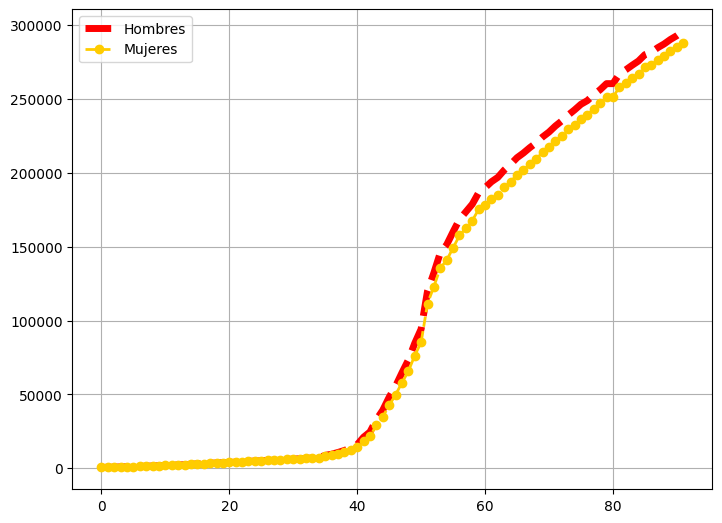

In [48]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot(df_m["Contagios"], label='Hombres', color='red', linestyle='dashed', linewidth=5)
axe.plot(df_f["Contagios"], label='Mujeres', c='#FFCC00', ls='--', lw=2, marker='o')
axe.legend(loc=0)
axe.grid()

### Límites del gráfico

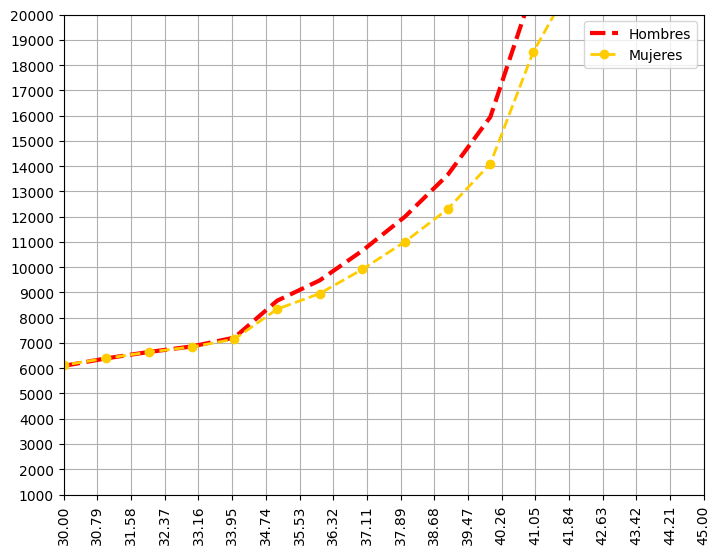

In [47]:
import matplotlib.ticker as ticker
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot(df_m["Contagios"], label='Hombres', color='red', linestyle='dashed', linewidth=3)
axe.plot(df_f["Contagios"], label='Mujeres', c='#FFCC00', ls='--', lw=2, marker='o')
axe.set_xlim( [30,45] )
axe.set_ylim( [1000,20000] )
axe.xaxis.set_major_locator(ticker.LinearLocator(20))
axe.yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.xticks(rotation=90)
axe.legend(loc=0)
axe.grid()

## Tipos de Gráfico

### A. Histograma

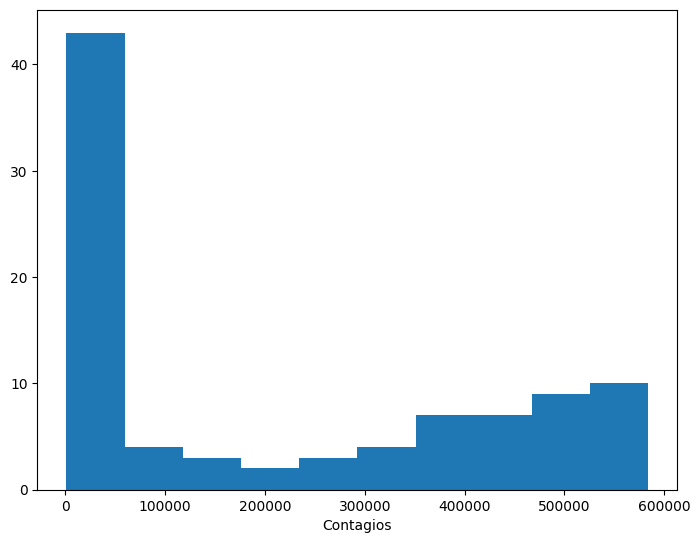

In [50]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.hist( df3['Contagios'], bins=10 )

axe.set_xlabel('Contagios')
fig.show()

### B. Diagrama de Caja

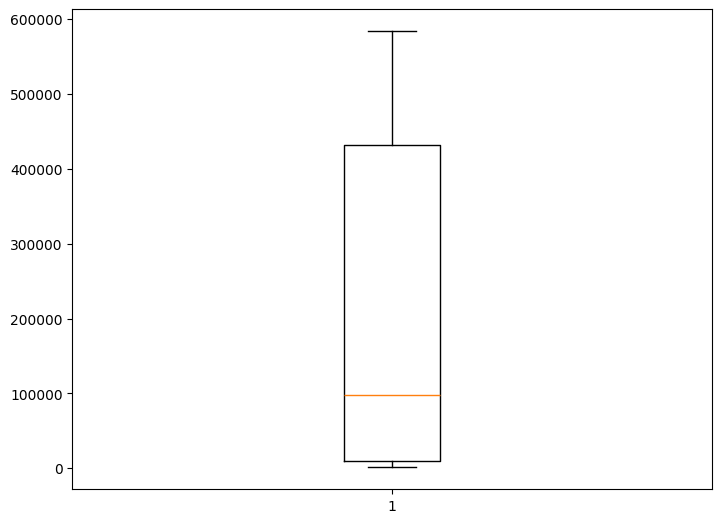

In [51]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.boxplot( df3['Contagios'].dropna() )

fig.show()

### C. Diagrama de Dispersión

In [52]:
 df3['Contagios']

,Contagios
0,1012
1,1252
2,1434
3,1723
4,1906
...,...
87,561152
88,566515
89,572664
90,577877


Text(0, 0.5, 'Contagios')

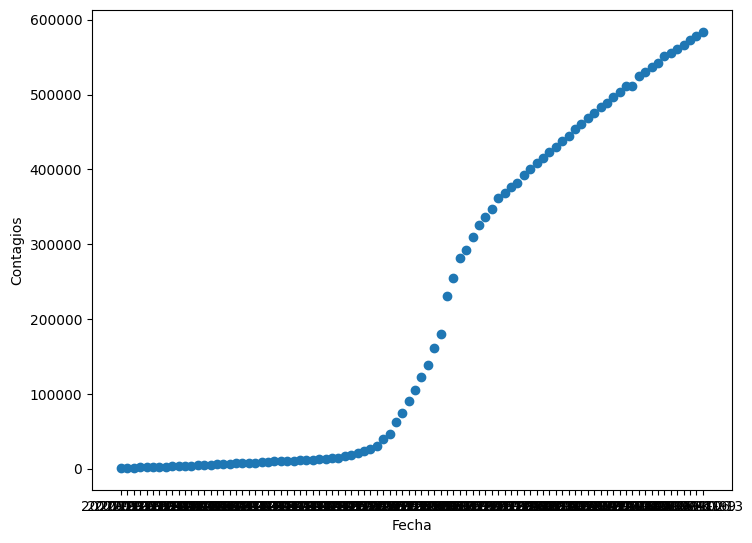

In [53]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.scatter( df3['Fecha'], df3['Contagios'] )

axe.set_xlabel('Fecha')
axe.set_ylabel('Contagios')

### D. Diagrama de Barras

In [54]:
df3 = df[df['Fecha']==df['Fecha'].max()].groupby('Grupo de edad').sum()\
                                        .reset_index()
df3.head()

,Grupo de edad,Sexo,Fecha,Contagios
0,00 - 04 años,MF,2020-11-132020-11-13,12718
1,05 - 09 años,MF,2020-11-132020-11-13,11463
2,10 - 14 años,MF,2020-11-132020-11-13,13652
3,15 - 19 años,MF,2020-11-132020-11-13,22617
4,20 - 24 años,MF,2020-11-132020-11-13,48247


Text(0, 0.5, 'Cant Contagios')

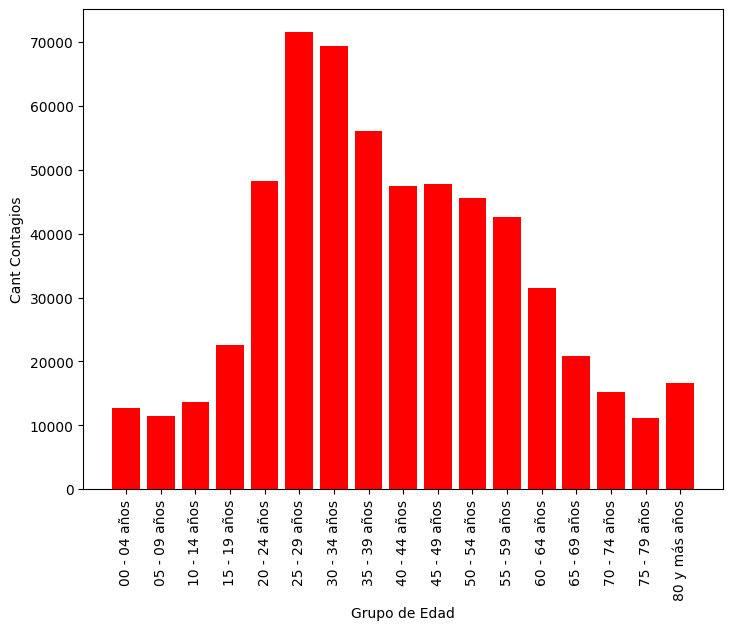

In [57]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.bar( df3['Grupo de edad'], df3['Contagios'],color='r' )

axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

### E. Diagrama de Torta

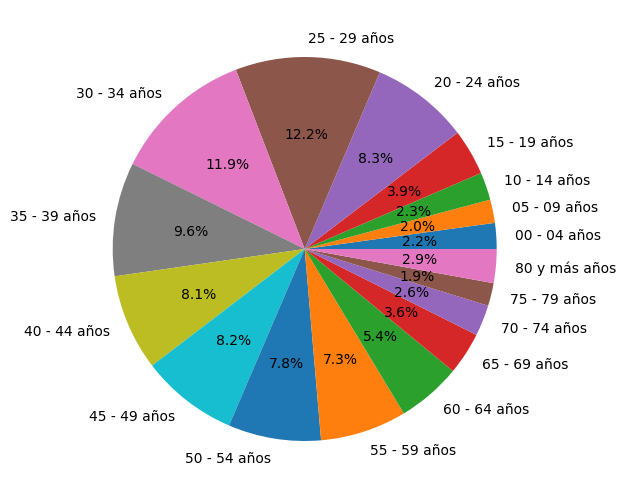

In [58]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.pie(df3['Contagios'], labels=df3['Grupo de edad'], autopct='%1.1f%%' )

fig.show()

### Combinación de diagramas

Text(0, 0.5, 'Cant Contagios')

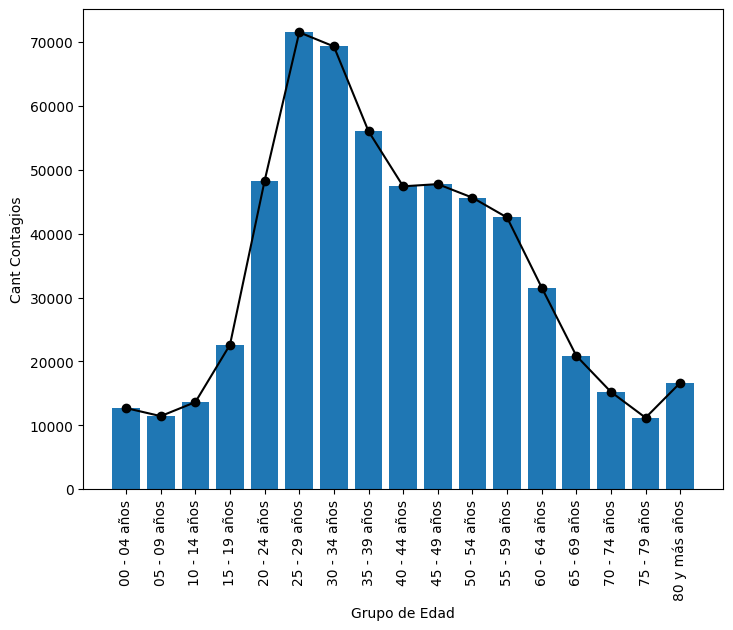

In [61]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )

axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

### Estilos

In [62]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [65]:
plt.style.use('Solarize_Light2')

Text(0, 0.5, 'Cant Contagios')

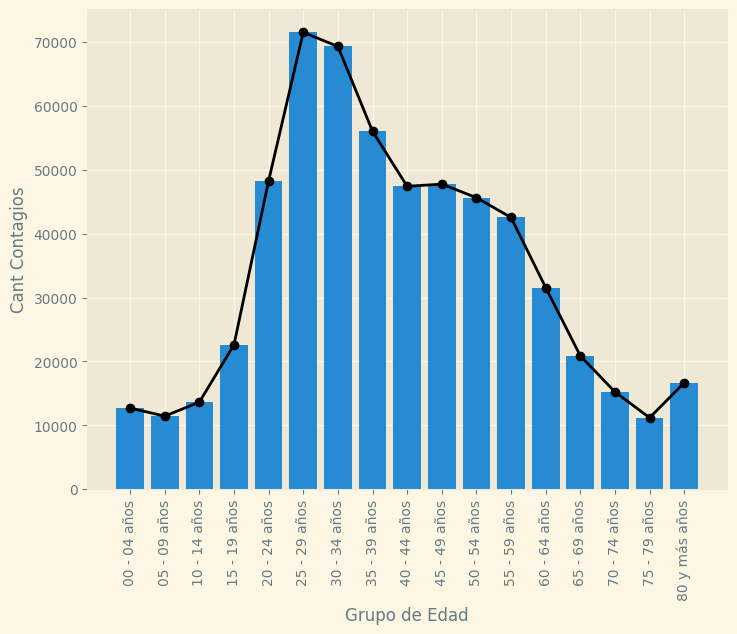

In [66]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )
axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

In [67]:
plt.style.use('ggplot')

Text(0, 0.5, 'Cant Contagios')

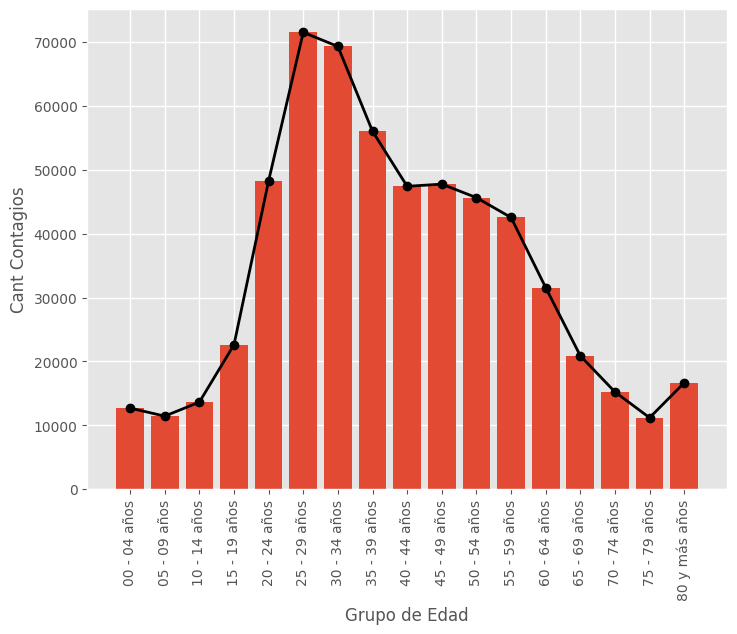

In [68]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )
axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

In [69]:
plt.style.use('fivethirtyeight')

Text(0, 0.5, 'Cant Contagios')

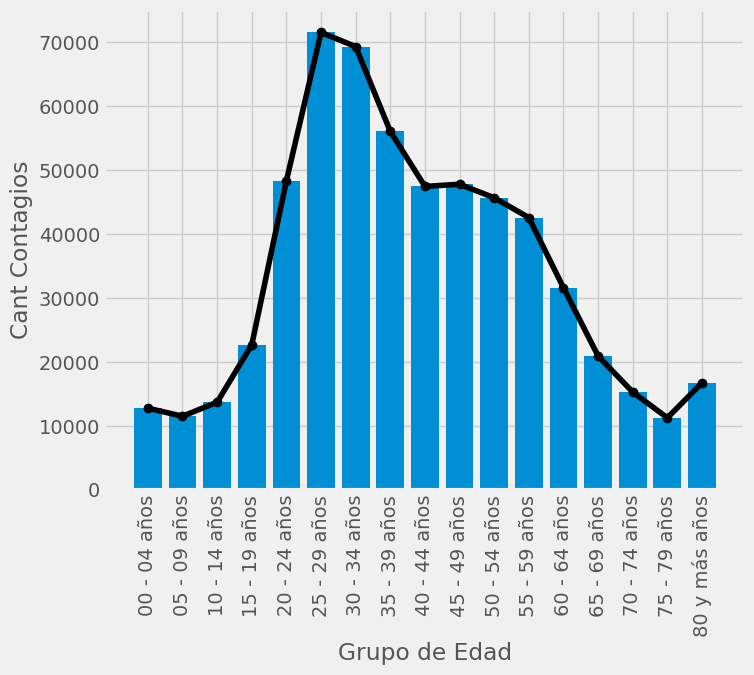

In [70]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )
axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

## Seaborn

In [74]:
import seaborn as sns

In [71]:
df

,Grupo de edad,Sexo,Fecha,Contagios
0,00 - 04 años,M,2020-03-25,4
1,05 - 09 años,M,2020-03-25,2
2,10 - 14 años,M,2020-03-25,7
3,15 - 19 años,M,2020-03-25,8
4,20 - 24 años,M,2020-03-25,25
...,...,...,...,...
3123,60 - 64 años,F,2020-11-13,14971
3124,65 - 69 años,F,2020-11-13,10089
3125,70 - 74 años,F,2020-11-13,7554
3126,75 - 79 años,F,2020-11-13,5866


In [72]:
df['Sexo'].value_counts()

,count
Sexo,
M,1564
F,1564


<Axes: xlabel='Sexo', ylabel='count'>

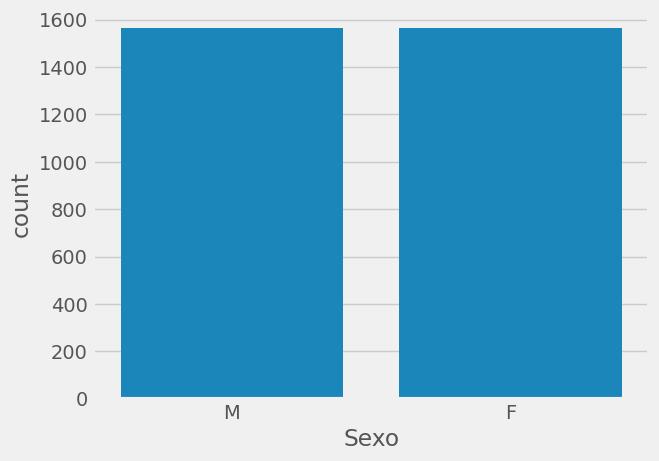

In [75]:
sns.countplot(x='Sexo', data=df)

<Axes: xlabel='Sexo', ylabel='Contagios'>

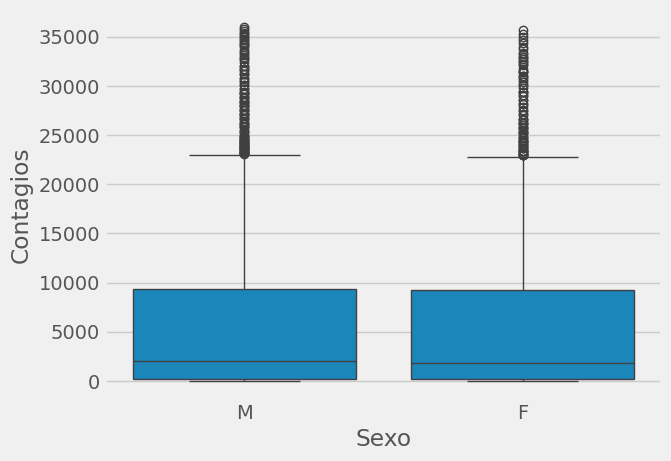

In [76]:
sns.boxplot(x='Sexo', y='Contagios', data=df)

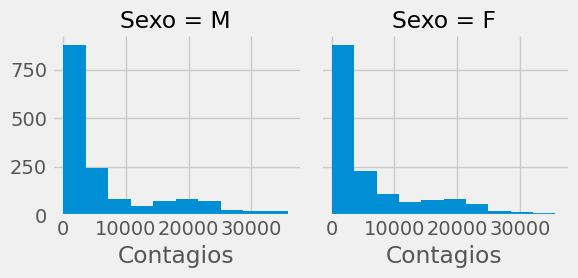

In [80]:
g=sns.FacetGrid(df, col='Sexo')
g.map(plt.hist, 'Contagios')